In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Data Cleaning and Standardization

In [2]:
df = pd.read_csv('./day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- The dataset is clean and free of missing data points.

In [5]:

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Data Visualization for Continuous Variables

In [7]:
df = df.drop(columns=['instant','dteday','casual','registered'])

Excluded variables that did not provide additional insights:
- Instant: A serial number without interpretive value.
- Dteday: Redundant as month and year were sufficient.
- Casual and Registered: Combined into the total count (cnt) for a more comprehensive analysis.

In [8]:

df[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


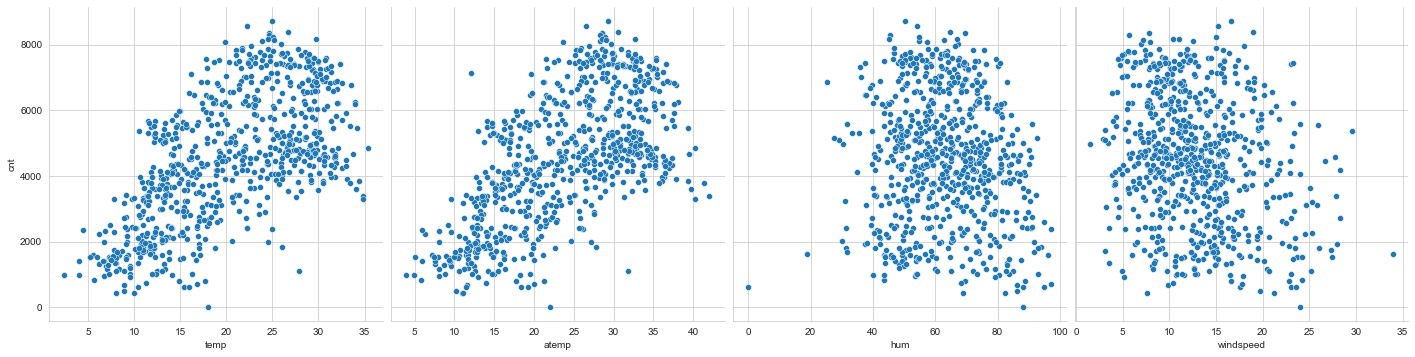

In [9]:
# Scatter Plots of Continuous variables vs 'cnt'
sns.set_style("whitegrid")
sns.pairplot(data=df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

#### Identifying Outliers in Numerical Data

In [10]:

# Drop outliers in temp
df = df.drop(index = df[(df['temp'] > 15) & (df['temp'] < 20) & (df['cnt'] < 100)].index)
df = df.drop(index = df[(df['temp'] > 25) & (df['temp'] < 30) & (df['cnt'] < 2000)].index)


# Drop outliers in atemp
df = df.drop(index = df[(df['atemp'] > 20) & (df['atemp'] < 25) & (df['cnt'] < 100)].index)
df = df.drop(index = df[(df['atemp'] > 30) & (df['atemp'] < 35) & (df['cnt'] < 2000)].index)


# Drop outliers in hum
df = df.drop(index = df[(df['hum'] < 20)].index)

# Drop outliers in windspeed
df = df.drop(index = df[(df['windspeed'] > 30)].index)

In [11]:
correlation = df[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].apply(lambda x : round(x,4))
correlation = pd.DataFrame(correlation).sort_values(by='cnt',ascending=False)
correlation.drop(index=['cnt'],inplace=True)
# dropping registered,casual, instant
correlation.style.background_gradient(cmap='GnBu')

,cnt
atemp,0.638900
temp,0.635600
hum,-0.107600
windspeed,-0.218100


In [12]:
# correlation between temp and atemp
df[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991726
atemp,0.991726,1.000000


In [13]:
df = df.drop(columns=['atemp'])

In [14]:
df[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


- The correlation analysis indicates that atemp is not highly correlated with hum or windspeed. Therefore, these features will not be removed from the feature set..

### Data Visualization for Categorical Features

In [15]:
# Changing Variables to Categorical Data Type
df[['season','weathersit','mnth']] = df[['season','weathersit','mnth']].astype('category')

In [16]:
# Check for disguised missing values]
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in cat_vars : 
    print('Unique values in ',i, df[i].unique())

Unique values in  season [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
Unique values in  yr [0 1]
Unique values in  mnth [1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12]
Length: 12
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]
Unique values in  holiday [0 1]
Unique values in  weekday [6 0 1 2 3 4 5]
Unique values in  workingday [0 1]
Unique values in  weathersit [2, 1, 3]
Categories (3, int64): [2, 1, 3]


In [17]:
# Replacing numbers with labels 
season_labels = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

mnth_labels = {
    1 : 'january',
    2 : 'february',
    3 : 'march',
    4 : 'april',
    5 : 'may',
    6 : 'june',
    7 : 'july',
    8 : 'august',
    9 : 'september',
    10 : 'october',
    11 : 'november',
    12 : 'december'
}

weekday_labels = { # considering the first row of dteday to be 01-01-2011
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}

weathersit_labels = {
    1 : 'clear',
    2 : 'cloudy',
    3 : 'light snow/rain'
}

# replacing numerals with labels 
df['season'] = df['season'].replace(season_labels)
df['mnth'] = df['mnth'].replace(mnth_labels)
df['weekday'] = df['weekday'].replace(weekday_labels)
df['weathersit'] = df['weathersit'].replace(weathersit_labels)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,january,0,Saturday,0,cloudy,14.110847,80.5833,10.749882,985
1,spring,0,january,0,Sunday,0,cloudy,14.902598,69.6087,16.652113,801
2,spring,0,january,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,january,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,january,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600


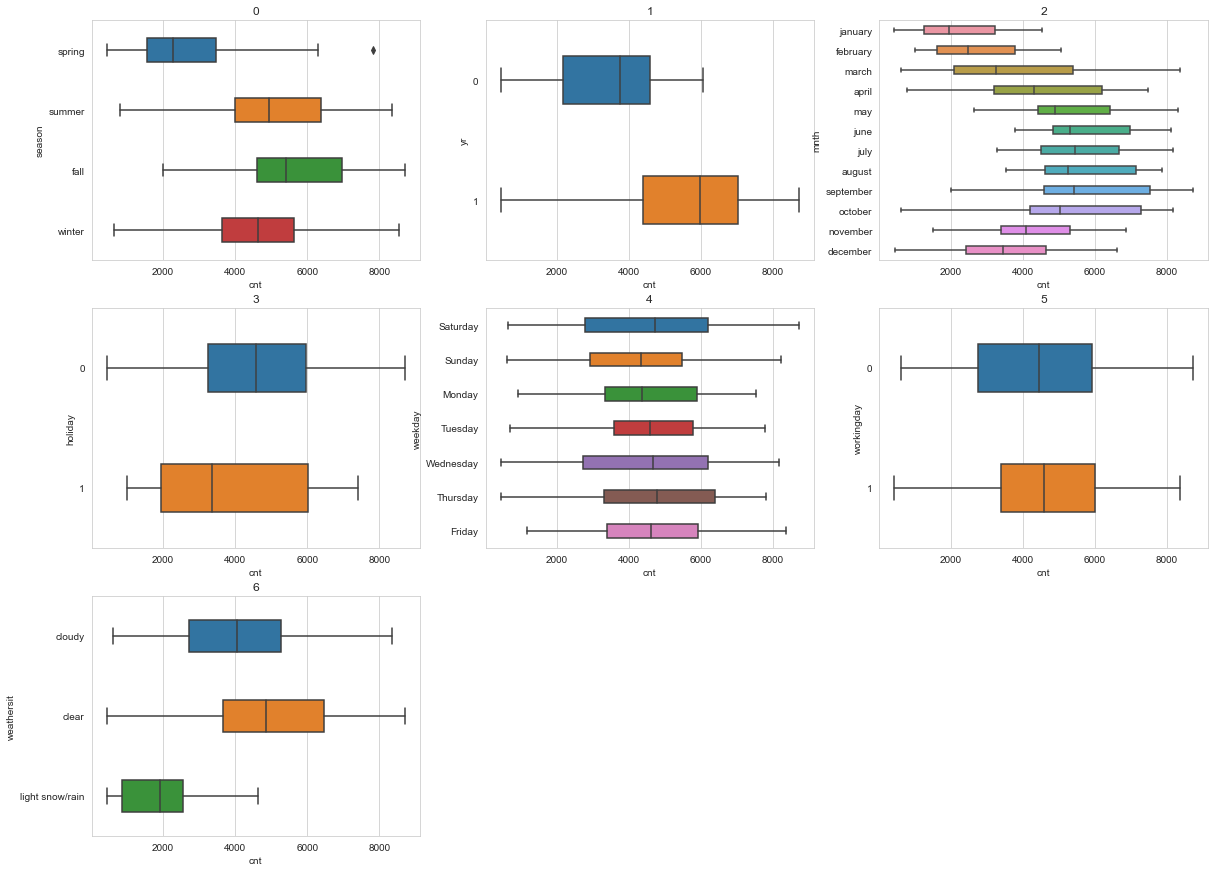

In [18]:
cat_vars = ['season','yr','mnth','holiday','weekday',  'workingday','weathersit']
df1 = df[cat_vars]
df1.loc[:,'cnt'] = df['cnt'].values
df1[['yr','holiday','workingday']] = df1[['yr','holiday','workingday']].astype('category')
plot_dim = [3,3]
fig,axs = plt.subplots(*plot_dim)
fig.set_figheight(15)
fig.set_figwidth(20)
for i in range(plot_dim[0]) :  
    for j in range(plot_dim[1]) :
        axs[i,j].set(title = i*plot_dim[1]+j)
        sns.boxplot(data=df1,x='cnt',y=cat_vars[i*plot_dim[1]+j],width=0.4,ax=axs[i,j])
        if i*plot_dim[1]+j == 6 : 
            break
axs[2,1].set_axis_off()
axs[2,2].set_axis_off()

Seasonal Trends

- Peak Season: Fall emerges as the peak season for rentals, outperforming even the summer months.
- Monthly Peak: September consistently records the highest rental volume, followed closely by its adjacent months.

Year-over-Year Comparison

- Significant Growth: 2019 experienced a substantial year-over-year increase in rentals, with a median growth of approximately 2,000 units.

Weekday vs. Holiday Rentals

- Weekday Consistency: Weekdays generally exhibit more stable rental patterns.
- Holiday Fluctuations: Holidays tend to have lower overall rental counts but higher variability, with Thursdays and Sundays showing notable fluctuations.

Overall Trend

- Seasonal Influence: Seasonal factors, particularly the impact of fall and specific months like September, play a significant role in shaping rental demand.
- Weekday and Holiday Impact: Weekday and holiday patterns also contribute to the overall rental trends, with weekdays generally more stable and holidays more variable.

In [19]:

# Drop rows where season is 'spring' and cnt is greater than 7000
df = df.drop(index=df[(df['season'] == 'spring') & (df['cnt'] > 7000)].index)


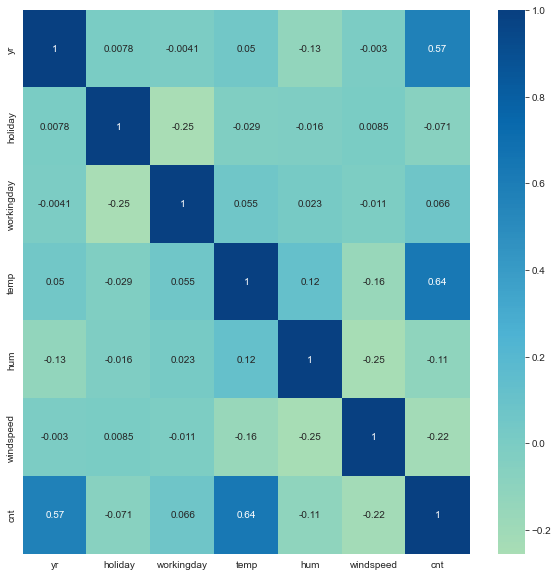

In [20]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap with only numeric columns
plt.figure(figsize=[10,10])
sns.heatmap(numeric_df.corr(), cmap='GnBu', center=0, annot=True)
plt.show()


#### Preparing the Data for Analysis

Creating Binary Variables

In [21]:
# creating indicator variable columns
season_indicators = pd.get_dummies(df['season'],drop_first=True)
mnth_indicators = pd.get_dummies(df['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(df['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(df['weathersit'],drop_first=True)

In [22]:

df = pd.concat([df,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
df = df.drop(columns=['season','mnth','weekday','weathersit'])

In [23]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'cloudy', 'light snow/rain'],
      dtype='object')

Dividing Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
dtrain,dtest = train_test_split(df,train_size=0.7,test_size=0.3,random_state=120)

Standardizing Numerical Features

In [28]:
# normalization of continuous variables
from sklearn.preprocessing import MinMaxScaler 
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed']

numerical_scaler.fit(dtrain[num_vars])
dtrain[num_vars] = numerical_scaler.transform(dtrain[num_vars])

X_train , y_train

In [29]:
y_train = dtrain.pop('cnt')
X_train = dtrain

In [30]:
y_train.head()

231    5191
717    5267
107    3429
595    4549
485    5740
Name: cnt, dtype: int64

In [31]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,august,...,october,september,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,cloudy,light snow/rain
231,0,0,0,0.795440,0.584687,0.155696,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
717,1,0,1,0.340632,0.516822,0.355128,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
107,0,0,1,0.564921,0.401392,0.303720,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
595,1,0,0,0.718600,0.636891,0.110569,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
485,1,0,1,0.690564,0.564384,0.285008,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [32]:
X_train.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'august', 'december', 'february', 'january', 'july',
       'june', 'march', 'may', 'november', 'october', 'september', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'cloudy',
       'light snow/rain'],
      dtype='object')

In [33]:
# Selecting 15 Features using RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [34]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
22,1,True,Sunday
21,1,True,Saturday
19,1,True,september
18,1,True,october
15,1,True,march
26,1,True,cloudy
13,1,True,july
27,1,True,light snow/rain
1,1,True,holiday


In [35]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Sunday', 'Saturday', 'september', 'october', 'march',
       'cloudy', 'july', 'light snow/rain', 'holiday', 'workingday',
       'temp', 'hum', 'spring', 'windspeed'], dtype=object)

In [36]:
# Following a stepwise elimination
import statsmodels.api as sm
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))


Model 
 * Using features selected by RFE : 'yr', 'Sunday', 'Saturday', 'november', 'january', 'december',
 'winter', 'july', 'spring', 'holiday', 'workingday', 'hum', 'temp',
 'windspeed', 'light snow/rain'

In [37]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     204.5
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.69e-194
Time:                        20:20:43   Log-Likelihood:                -4056.3
No. Observations:                 506   AIC:                             8143.
Df Residuals:                     491   BIC:                             8206.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2176.5692    161.164     

In [38]:
del_feature = 'holiday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     204.5
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.69e-194
Time:                        20:20:44   Log-Likelihood:                -4056.3
No. Observations:                 506   AIC:                             8143.
Df Residuals:                     491   BIC:                             8206.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2288.7541    267.441     

In [39]:
del_feature = 'Sunday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          4.30e-195
Time:                        20:20:45   Log-Likelihood:                -4057.7
No. Observations:                 506   AIC:                             8143.
Df Residuals:                     492   BIC:                             8203.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2560.4922    210.852     

In [40]:
del_feature = 'january'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          4.30e-195
Time:                        20:20:45   Log-Likelihood:                -4057.7
No. Observations:                 506   AIC:                             8143.
Df Residuals:                     492   BIC:                             8203.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2560.4922    210.852     

In [41]:
del_feature = 'december'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          4.30e-195
Time:                        20:20:46   Log-Likelihood:                -4057.7
No. Observations:                 506   AIC:                             8143.
Df Residuals:                     492   BIC:                             8203.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2560.4922    210.852     

In [42]:
del_feature = 'november'
selected_features = selected_features[selected_features!=del_feature]
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          4.30e-195
Time:                        20:20:47   Log-Likelihood:                -4057.7
No. Observations:                 506   AIC:                             8143.
Df Residuals:                     492   BIC:                             8203.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2560.4922    210.852     

In [43]:
vif(X_train[selected_features])

              index        vif
0             const  40.460753
10             temp   2.284561
11              hum   2.203966
12           spring   1.956759
6            cloudy   1.756827
9        workingday   1.631624
2          Saturday   1.617526
8   light snow/rain   1.400416
7              july   1.365049
13        windspeed   1.201156
3         september   1.156841
4           october   1.113555
5             march   1.111349
1                yr   1.046675


In [44]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          4.30e-195
Time:                        20:20:49   Log-Likelihood:                -4057.7
No. Observations:                 506   AIC:                             8143.
Df Residuals:                     492   BIC:                             8203.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2560.4922    210.852     

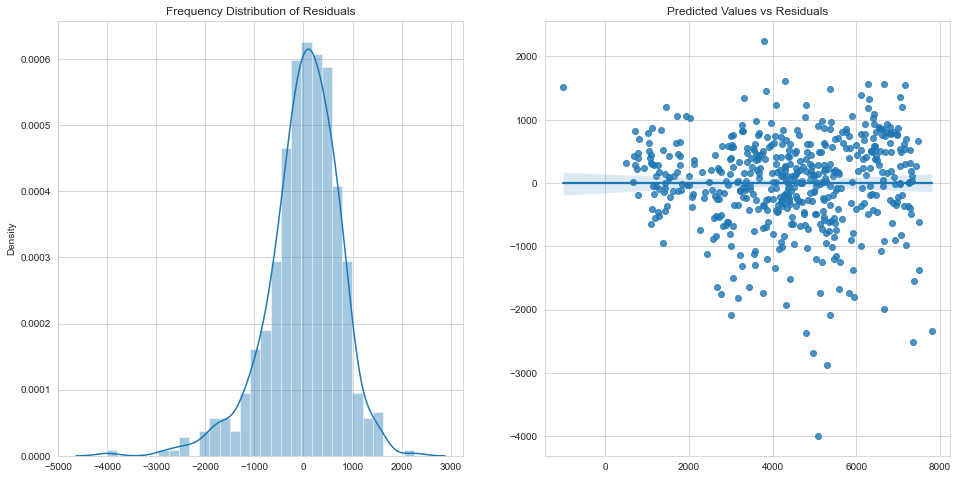

In [45]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()


In [46]:
# Mean of Residuals
(y_train-y_train_pred).mean()

2.232396086169915e-12

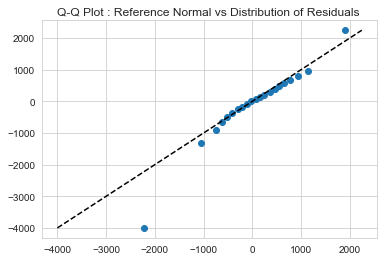

In [47]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()


Conclusion

Our analysis indicates that the following factors significantly influence shared bike demand:

Seasonal Patterns:

- Peak Seasons: Fall and specific months like September exhibit higher demand.
- Off-Peak Seasons: Winter months with adverse weather conditions tend to have lower demand.

Weather Conditions:

- Temperature and Humidity: Optimal temperature and humidity levels positively impact rental demand.
- Adverse Weather: Conditions like heavy rain, snow, or strong winds can significantly reduce demand.

Day of the Week and Holidays:

- Weekends: Weekends, particularly Sundays, often see increased demand.
- Holidays: Holiday periods can influence demand, depending on the specific holiday and local customs.

By understanding these factors, bike-sharing companies can make data-driven decisions to optimize operations and meet customer demand effectively. This includes strategies like:

- Fleet Management: Adjusting fleet size and distribution based on seasonal and weather-related 
fluctuations.
- Pricing Strategies: Implementing dynamic pricing models that reflect demand patterns.
- Marketing Campaigns: Targeting specific demographics and offering promotions during peak seasons.
- Infrastructure Planning: Expanding or optimizing bike stations in high-demand areas.
By leveraging these insights, bike-sharing companies can improve customer satisfaction, increase revenue, and enhance their overall business performance.